In [1]:
import json

In [2]:
x = '{"name":"John", "age":30, "city":"New York"}'

In [4]:
y = json.loads(x)

In [7]:
print(y['name'])

John


In [8]:
print(json.dumps({"name": "John", "age": 30}))
print(json.dumps(["apple", "bananas"]))
print(json.dumps(("apple", "bananas")))
print(json.dumps("hello"))
print(json.dumps(42))
print(json.dumps(31.76))
print(json.dumps(True))
print(json.dumps(False))
print(json.dumps(None))

{"name": "John", "age": 30}
["apple", "bananas"]
["apple", "bananas"]
"hello"
42
31.76
true
false
null


In [9]:
z = {
  "name": "John",
  "age": 30,
  "married": True,
  "divorced": False,
  "children": ("Ann","Billy"),
  "pets": None,
  "cars": [
    {"model": "BMW 230", "mpg": 27.5},
    {"model": "Ford Edge", "mpg": 24.1}
  ]
}

print(json.dumps(z))

{"name": "John", "age": 30, "married": true, "divorced": false, "children": ["Ann", "Billy"], "pets": null, "cars": [{"model": "BMW 230", "mpg": 27.5}, {"model": "Ford Edge", "mpg": 24.1}]}


In [15]:
z['cars'][0]

{'model': 'BMW 230', 'mpg': 27.5}

In [16]:
json.dumps(z, indent=4)

'{\n    "name": "John",\n    "age": 30,\n    "married": true,\n    "divorced": false,\n    "children": [\n        "Ann",\n        "Billy"\n    ],\n    "pets": null,\n    "cars": [\n        {\n            "model": "BMW 230",\n            "mpg": 27.5\n        },\n        {\n            "model": "Ford Edge",\n            "mpg": 24.1\n        }\n    ]\n}'

In [20]:
json.dumps(z, separators=("____", " = "), sort_keys=True)

'{"age" = 30____"cars" = [{"model" = "BMW 230"____"mpg" = 27.5}____{"model" = "Ford Edge"____"mpg" = 24.1}]____"children" = ["Ann"____"Billy"]____"divorced" = false____"married" = true____"name" = "John"____"pets" = null}'

In [21]:
%%bashhead NYPD.json

UsageError: Cell magic `%%bashhead` not found.


In [2]:
address = '.\NYPD.json'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 1-2: malformed \N character escape (Temp/ipykernel_4996/4150944422.py, line 1)

In [6]:
import pandas as pd
import numpy as np

In [4]:
address = '.\data_NYPD.json'

In [51]:
# JSON file
f = open (address, "r")
  
data = json.loads(f.read())
for i in data['view']:
    print(i)
  
# Closing file
f.close()

KeyError: 'view'

In [17]:
import ijson
filename = address
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)

In [18]:
print(columns[0])

{'id': -1, 'name': 'sid', 'dataTypeName': 'meta_data', 'fieldName': ':sid', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']}


In [20]:
column_names = [col["fieldName"] for col in columns]
column_names


[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'incident_key',
 'occur_date',
 'occur_time',
 'boro',
 'precinct',
 'jurisdiction_code',
 'location_desc',
 'statistical_murder_flag',
 'perp_age_group',
 'perp_sex',
 'perp_race',
 'vic_age_group',
 'vic_sex',
 'vic_race',
 'x_coord_cd',
 'y_coord_cd',
 'latitude',
 'longitude',
 'geocoded_column',
 ':@computed_region_efsh_h5xi',
 ':@computed_region_f5dn_yrer',
 ':@computed_region_yeji_bk3q',
 ':@computed_region_92fq_4b7q',
 ':@computed_region_sbqj_enih']

In [21]:
columns_data = [
 'incident_key',
 'occur_date',
 'occur_time',
 'boro',
 'precinct',
 'jurisdiction_code',
 'location_desc',
 'statistical_murder_flag',
 'perp_age_group',
 'perp_sex',
 'perp_race',
 'vic_age_group',
 'vic_sex',
 'vic_race',
 'x_coord_cd',
 'y_coord_cd',
 'latitude',
 'longitude',
 'geocoded_column',
]

In [31]:
data = []

with open(filename,'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in columns_data:
            selected_row.append(row[column_names.index(item)])
            data.append(selected_row)

In [32]:
len(data)

447792

In [34]:
import pandas as pd
stops = pd.DataFrame(data, columns=columns_data)

In [98]:
stops.head(100)

,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,location_desc,statistical_murder_flag,perp_age_group,perp_sex,perp_race,vic_age_group,vic_sex,vic_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,date
0,201575314,2019-08-23T00:00:00,22:10:00,QUEENS,103,0,None,False,None,None,None,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),2019-08-23 22:10:00
1,201575314,2019-08-23T00:00:00,22:10:00,QUEENS,103,0,None,False,None,None,None,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),2019-08-23 22:10:00
2,201575314,2019-08-23T00:00:00,22:10:00,QUEENS,103,0,None,False,None,None,None,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),2019-08-23 22:10:00
3,201575314,2019-08-23T00:00:00,22:10:00,QUEENS,103,0,None,False,None,None,None,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),2019-08-23 22:10:00
4,201575314,2019-08-23T00:00:00,22:10:00,QUEENS,103,0,None,False,None,None,None,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),2019-08-23 22:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,198255460,2019-06-07T00:00:00,17:50:00,BROOKLYN,73,0,None,False,45-64,M,WHITE HISPANIC,25-44,M,BLACK,1009650,186966,40.679827,-73.908425,POINT (-73.90842523899994 40.67982701600005),2019-06-07 17:50:00
96,198255460,2019-06-07T00:00:00,17:50:00,BROOKLYN,73,0,None,False,45-64,M,WHITE HISPANIC,25-44,M,BLACK,1009650,186966,40.679827,-73.908425,POINT (-73.90842523899994 40.67982701600005),2019-06-07 17:50:00
97,198255460,2019-06-07T00:00:00,17:50:00,BROOKLYN,73,0,None,False,45-64,M,WHITE HISPANIC,25-44,M,BLACK,1009650,186966,40.679827,-73.908425,POINT (-73.90842523899994 40.67982701600005),2019-06-07 17:50:00
98,198255460,2019-06-07T00:00:00,17:50:00,BROOKLYN,73,0,None,False,45-64,M,WHITE HISPANIC,25-44,M,BLACK,1009650,186966,40.679827,-73.908425,POINT (-73.90842523899994 40.67982701600005),2019-06-07 17:50:00


In [36]:
stops.perp_race.value_counts()

BLACK                             187245
WHITE HISPANIC                     37259
UNKNOWN                            35511
BLACK HISPANIC                     20539
WHITE                               4845
ASIAN / PACIFIC ISLANDER            2280
AMERICAN INDIAN/ALASKAN NATIVE        38
Name: perp_race, dtype: int64

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

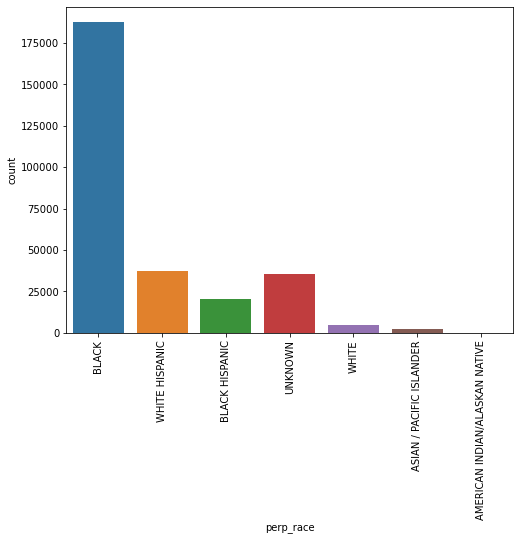

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'perp_race', orient = 'h' , data = stops);
plt.xticks(rotation=90);

In [50]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447792 entries, 0 to 447791
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   incident_key             447792 non-null  object
 1   occur_date               447792 non-null  object
 2   occur_time               447792 non-null  object
 3   boro                     447792 non-null  object
 4   precinct                 447792 non-null  object
 5   jurisdiction_code        447754 non-null  object
 6   location_desc            189753 non-null  object
 7   statistical_murder_flag  447792 non-null  bool  
 8   perp_age_group           287071 non-null  object
 9   perp_sex                 287717 non-null  object
 10  perp_race                287717 non-null  object
 11  vic_age_group            447792 non-null  object
 12  vic_sex                  447792 non-null  object
 13  vic_race                 447792 non-null  object
 14  x_coord_cd          

In [52]:
import numpy as np
def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x

In [53]:

stops["longitude"] = stops["longitude"].apply(lambda x: parse_float(x))
stops["latitude"] = stops["latitude"].apply(lambda x: parse_float(x))

In [55]:
import datetime
def parse_full_date(row):
    date = datetime.datetime.strptime(row["occur_date"], "%Y-%m-%dT%H:%M:%S")
    time = row["occur_time"].split(":")
    date = date.replace(hour=int(time[0]), minute = int(time[1]), second = int(time[2]))
    return date
stops["date"] = stops.apply(parse_full_date, axis=1)

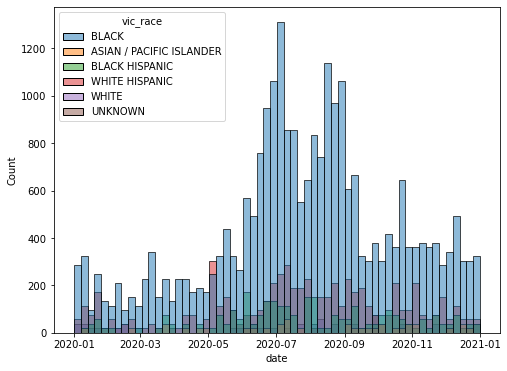

In [124]:
stops_2020 = stops[stops['date']>='2020']
plt.figure(figsize=(8,6))
sns.histplot(stops_2020, x="date", hue='vic_race',bins=60);

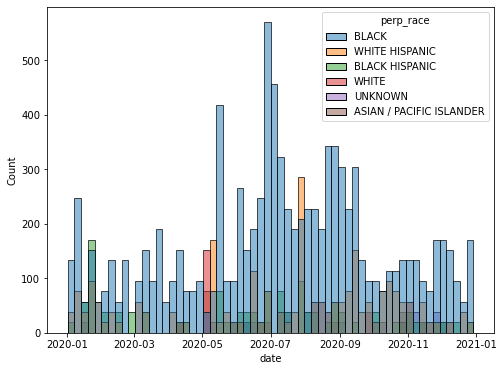

In [126]:
stops_2020 = stops[stops['date']>='2020']
plt.figure(figsize=(8,6))
sns.histplot(stops_2020, x="date", hue='perp_race',bins=60);

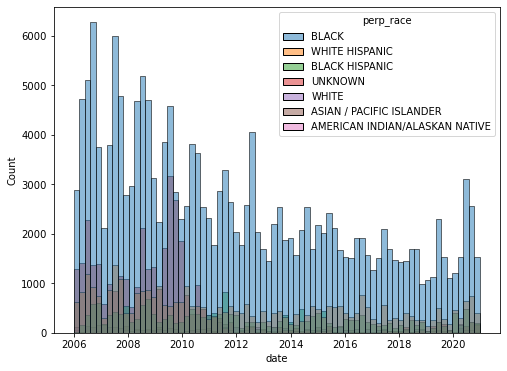

In [105]:
plt.figure(figsize=(8,6))
sns.histplot(data=stops, x="date", hue='perp_race');

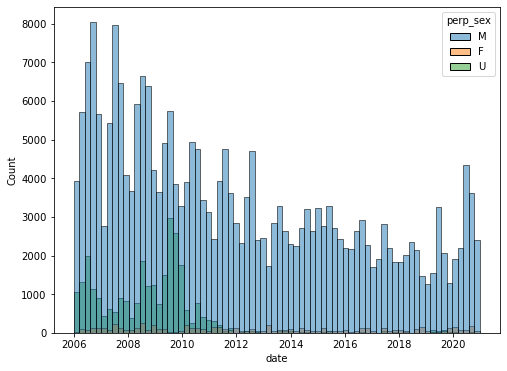

In [66]:
plt.figure(figsize=(8,6))
sns.histplot(data=stops, x="date", hue='perp_sex');

In [150]:
maxi = max(stops["date"].dt.hour)
mini = min(stops["date"].dt.hour)
maxi
mini

0

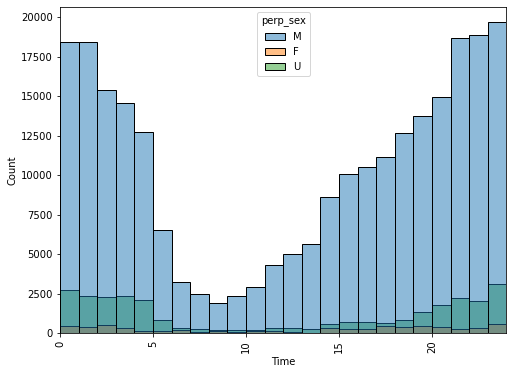

In [160]:
plt.figure(figsize=(8,6))
# bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],

sns.histplot(data=stops, x=stops["date"].dt.hour, hue='perp_sex', bins = np.arange(mini, maxi+2))
# mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
# ax.set_xticks(np.round(mids))
plt.xlim(right=24)  # adjust the right leaving left unchanged
plt.xlim(left=0)
              
plt.xticks(rotation=90)
plt.xlabel('Time');
plt.savefig('time.png')


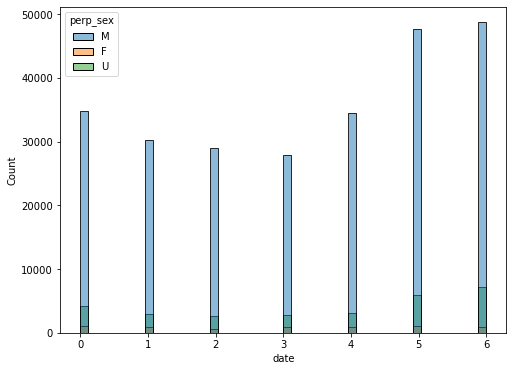

In [71]:
plt.figure(figsize=(8,6))
sns.histplot(data=stops, x=stops["date"].dt.weekday, hue='perp_sex');

In [ ]:
import folium
from folium import plugins

In [83]:
from folium.plugins import MarkerCluster

In [87]:
stops_map = folium.Map(location=[-73.80814071699996, 40.697805308000056], zoom_start=11)
marker_cluster = folium.plugins.MarkerCluster().add_to(stops_map)

In [100]:
stops_heatmap = folium.Map(location=[40.697805308000056,-73.80814071699996], zoom_start=11)
stops_heatmap.add_children(plugins.HeatMap([[row["latitude"], row["longitude"]] for name, row in stops_2020.iterrows()]))
stops_heatmap.save("heatmap.html")
stops_heatmap

C:\Users\STaine\AppData\Local\Temp/ipykernel_4996/3534112737.py:2: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  stops_heatmap.add_children(plugins.HeatMap([[row["latitude"], row["longitude"]] for name, row in stops_2020.iterrows()]))


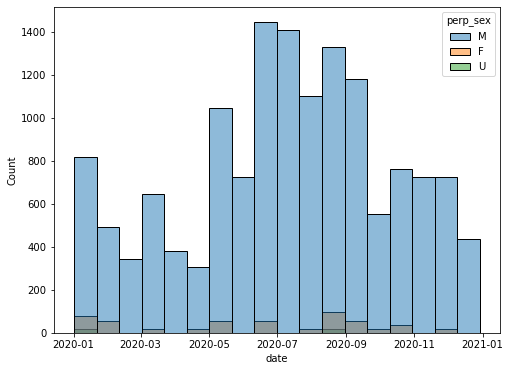

In [117]:
plt.figure(figsize=(8,6))
sns.histplot(stops_2020, x="date", hue='perp_sex',bins = 18);

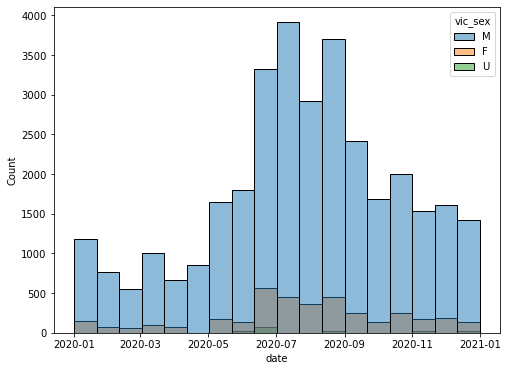

In [115]:
plt.figure(figsize=(8,6))
sns.histplot(stops_2020, x="date", hue='vic_sex',bins = 18);